In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_split=4)
iris = load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [3]:
from sklearn.tree import export_graphviz

In [4]:
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)

In [5]:
import graphviz

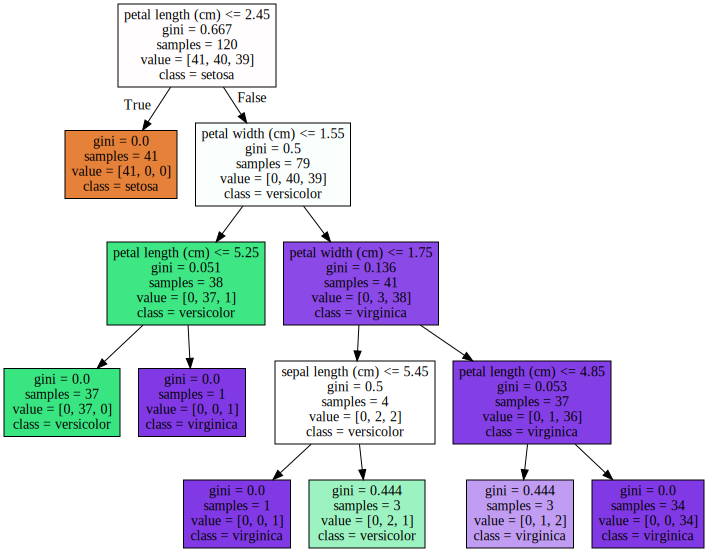

In [6]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
import seaborn as sns
import numpy as np

print('Feature importance: {}'.format(np.round(dt_clf.feature_importances_,3)))

Feature importance: [0.009 0.    0.557 0.435]


In [8]:
for name,value in zip(iris.feature_names,dt_clf.feature_importances_):
    print('{}:{}'.format(name,value))

sepal length (cm):0.008622547962923045
sepal width (cm):0.0
petal length (cm):0.5567964235514892
petal width (cm):0.43458102848558794


<AxesSubplot:>

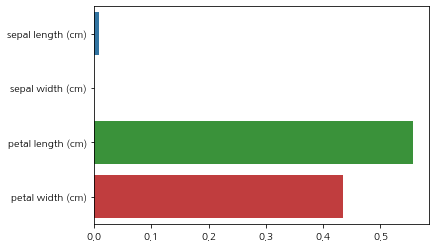

In [10]:
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

In [9]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {}'.format(f1))

NameError: name 'pred' is not defined

### 결정트리 과적합

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

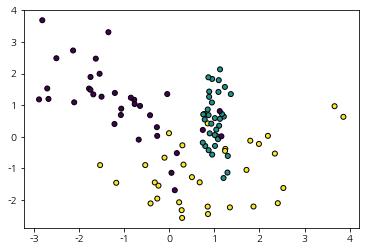

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해 피처 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')


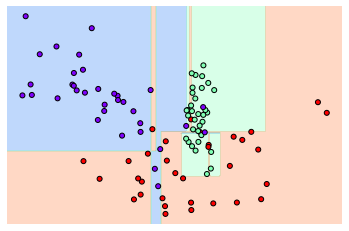

In [16]:
# 특정한 트리 생성 제약이 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

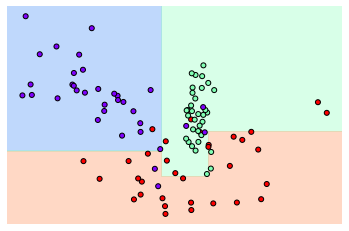

In [17]:
# min_samples_leaf=6으로 트리 결정 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)